# Diabetes Prediction

### Importing the Dependencies

##### Data Collection and Analysis

##### PIMA Diabetes Dataset

In [ ]:
import pandas as pd
import numpy as np
import sqlite3
import sklearn
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport
from IPython.core.interactiveshell import InteractiveShell  # to execute all lines and print
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings('ignore')

##### About this file
This dataset is synthetic and generated for diabetes prediction purposes. 
It includes various features related to diabetes risk factors and a corresponding diagnosis label indicating whether an individual has diabetes or not.

In [2]:
diabetes_dataset = pd.read_csv("diabetes.csv")
diabetes_dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

#### Attribute Information

**Pregnancies** : Number of pregnancies the individual has had. <br>
**Glucose** : Plasma glucose concentration (mg/dL) measured during an oral glucose tolerance test. <br>
**BloodPressure** : Diastolic blood pressure (mm Hg). <br>
**SkinThickness** : Thickness of skinfold (mm) at the triceps. <br>
**Insulin** : 2-Hour serum insulin (mu U/ml). <br>
**BMI**: 2-Hour serum insulin (mu U/ml). <br>
**DiabetesPedigreeFunction**: Diabetes pedigree function, which represents the likelihood of diabetes based on family history. <br>
**Age** : Age of the individual (years). <br>
**Outcome** : Binary label indicating whether the individual has diabetes (1) or not (0). <br>

In [3]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
diabetes_dataset["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
diabetes_dataset.groupby("Outcome").mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

##### Ydata Profiling

In [7]:
profile = ProfileReport(diabetes_dataset, title = "Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [9]:
X
Y

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=2, stratify=Y)

In [11]:
#Splitting into equal proportions
Y_train.value_counts(normalize = True)*100
Y_test.value_counts(normalize = True)*100 

Outcome
0    65.14658
1    34.85342
Name: proportion, dtype: float64

Outcome
0    64.935065
1    35.064935
Name: proportion, dtype: float64

In [12]:
numerical_columns = X_train.select_dtypes(exclude="object").columns.tolist()
numerical_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

### Exploratory Data Analysis(EDA)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

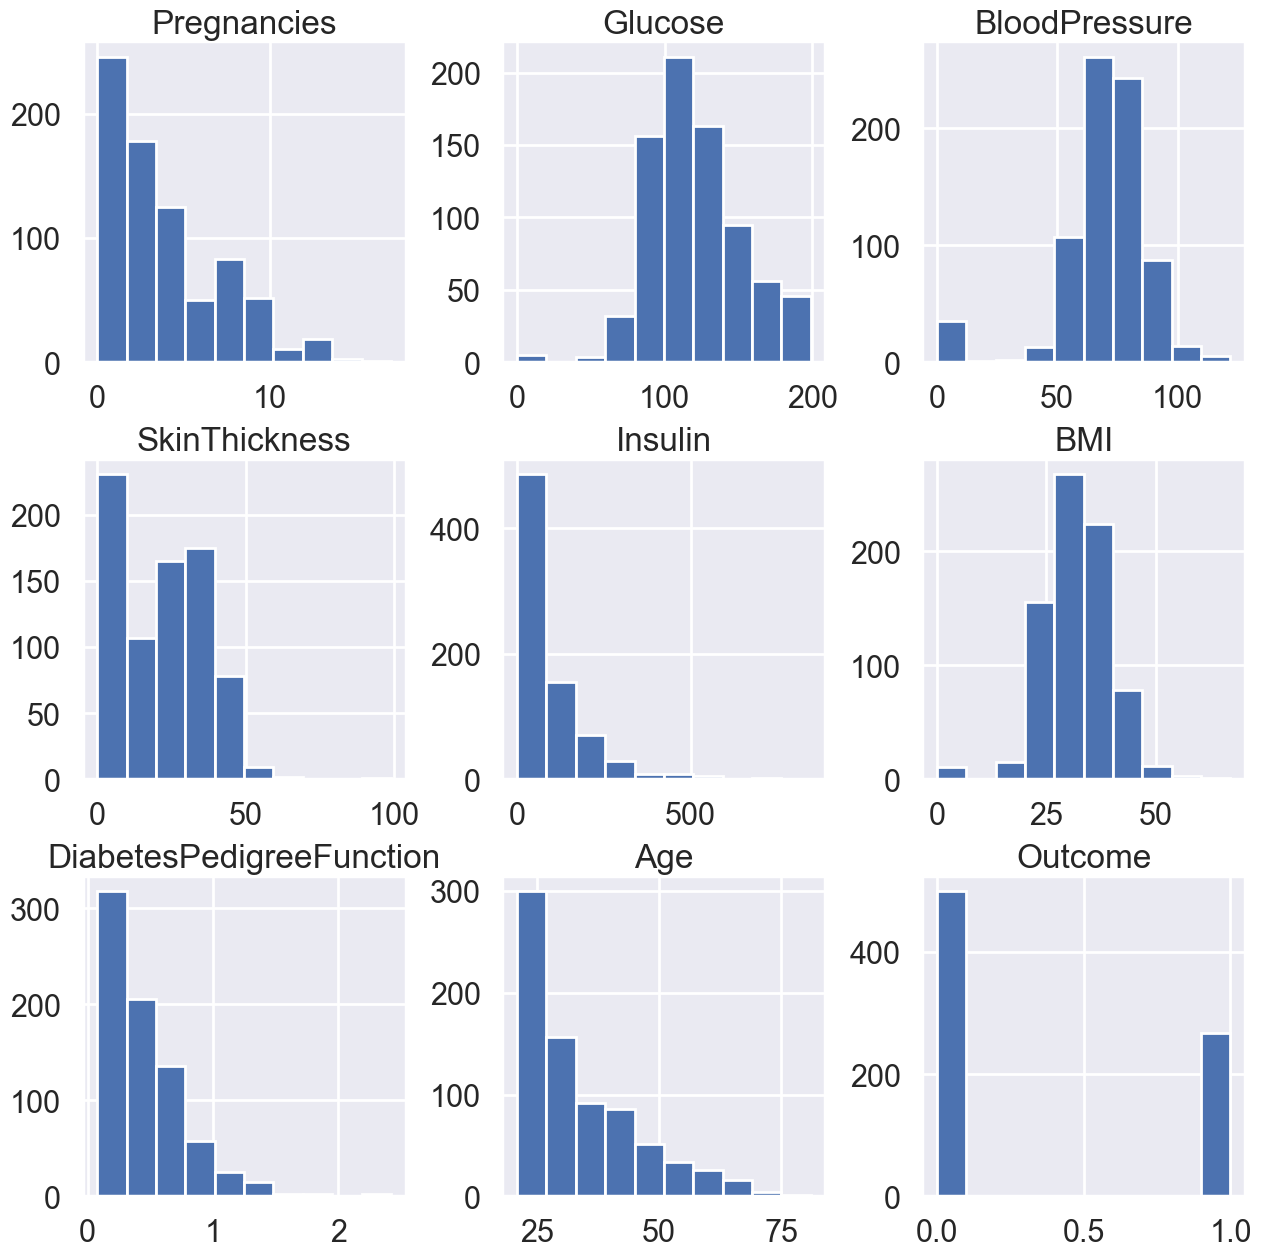

In [67]:
diabetes_dataset.hist(figsize=(15,15))

<Figure size 700x700 with 0 Axes>

Text(0.5, 1.0, 'Diagnosis')

([<matplotlib.patches.Wedge at 0x1bd05555d30>,
 [Text(-0.5025943242672991, 0.9784676515931925, 'Yes'),
  Text(0.5025944158780503, -0.9784676045369114, 'No')],
 [Text(-0.27414235869125403, 0.5337096281417413, '65%'),
  Text(0.2741424086607547, -0.5337096024746789, '35%')])

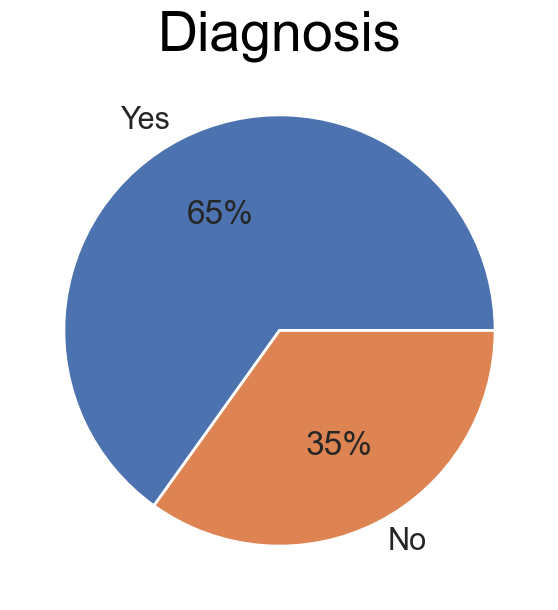

In [59]:
#pie chart
import matplotlib.pyplot as plt
#Pie-chart for visualization of diagnosis (1: No, 0: Yes)
labels=['Yes','No']
values=diabetes_dataset['Outcome'].value_counts().values

sns.set_theme(context='poster')
plt.figure(figsize=(7,7))
plt.title('Diagnosis', color="Black",fontsize=40)

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.show()

In [13]:
corr_matrix = diabetes_dataset.corr(numeric_only=True)
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

Text(0.5, 1.0, 'Correlation Plot')

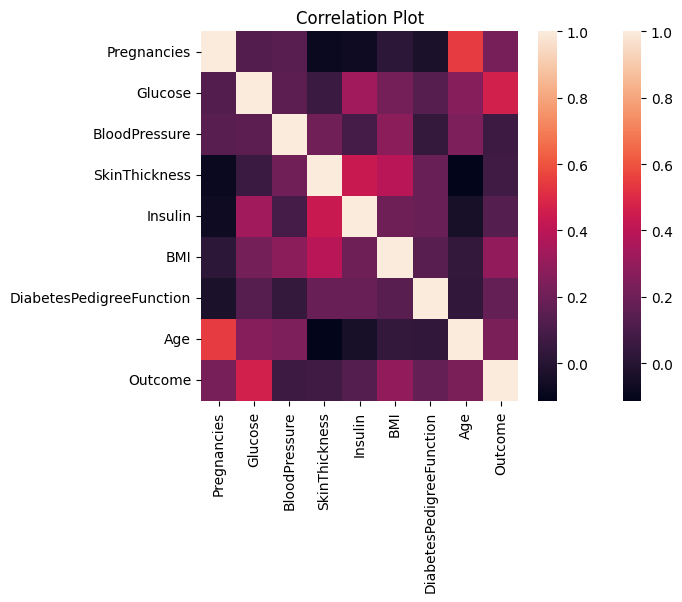

In [15]:
%matplotlib inline
sns.heatmap(diabetes_dataset.corr()).set_title('Correlation Plot')
plt.show()

Text(0.5, 1.0, 'Diabetis Analysis Prediction for females')

<Axes: title={'center': 'Diabetis Analysis Prediction for females'}, xlabel='Outcome', ylabel='Glucose'>

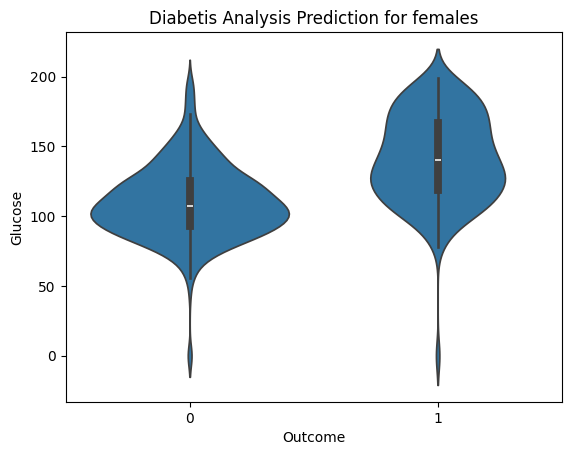

In [16]:
plt.title('Diabetis Analysis Prediction for females')
sns.violinplot(x=Y, y="Glucose", data=diabetes_dataset)
plt.show()

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class Preprocessor(BaseEstimator, TransformerMixin): 
    # Train our custom preprocessors 
    numerical_columns = numerical_columns
    categorical_columns = []
    def fit(self, X, y=None): 

        # Create and fit simple imputer
        self.imputer = SimpleImputer(strategy='median')
        self.imputer.fit(X[self.numerical_columns])
        
        # Create and fit Standard Scaler 
        self.scaler = StandardScaler()
        self.scaler.fit(X[self.numerical_columns]) 
        
        return self 

    def transform(self, X): 
        
        # Apply simple imputer 
        imputed_cols = self.imputer.transform(X[self.numerical_columns])        
        # Copy the df 
        transformed_df = X.copy()
         
        # Apply transformed columns
        transformed_df[self.numerical_columns] = imputed_cols
        transformed_df[self.numerical_columns] = self.scaler.transform(transformed_df[self.numerical_columns])        
        
        return transformed_df

In [18]:
preprocessor = Preprocessor()
preprocessor.fit(X_train)
X_train_fixed = preprocessor.transform(X_train)

Preprocessor()

In [20]:
X_train_fixed

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
619    -1.137965 -0.079711      -3.555607      -1.290752 -0.701889  0.028250   
329     0.640679 -0.520919       0.025496       0.700665 -0.127895 -0.171845   
13     -0.841524  2.126328      -0.486090       0.140579  6.439277 -0.259386   
476    -0.545084 -0.520919       0.537082       1.509678  0.910360  0.190827   
45     -1.137965  1.842694      -0.179138       1.136288 -0.701889  1.228820   
..           ...       ...            ...            ...       ...       ...   
303     0.344238 -0.205770       1.457937      -1.290752 -0.701889  2.591966   
592    -0.248643  0.329982       0.537082      -1.290752 -0.701889  0.278369   
559     2.122881 -1.151216       0.230130      -1.290752 -0.701889 -0.259386   
725     0.047797 -0.300315       0.434765       1.198519 -0.701889  0.903666   
253    -1.137965 -1.119701      -0.076821       0.700665 -0.701889  0.453452   

     DiabetesPedigreeFunction       Age  
619                 -0.981597 -0.788523  
329                 -1.038238  0.318794  
13                  -0.215455  2.192716  
476                  0.717629 -0.362632  
45                   4.241287 -0.703345  
..                        ...       ...  
303                 -0.778882 -0.447810  
592                 -0.203530  0.915042  
559                 -0.507602  0.148438  
725                 -0.698393  0.403973  
253                 -0.692431 -0.703345  

[614 rows x 8 columns]

In [26]:
# !pip install xgboost  # Need to be installed

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

In [27]:
pipelines = {
    'ridge': make_pipeline(Preprocessor(), Ridge()),
    'rf': make_pipeline(Preprocessor(), RandomForestRegressor()),
    'gb': make_pipeline(Preprocessor(), GradientBoostingRegressor()),
    'xg': make_pipeline(Preprocessor(), XGBRegressor()),
}


grid = {
    'ridge':{'ridge__alpha':[0.05, 0.25, 0.5, 1.0]},
    'rf':{
        'randomforestregressor__n_estimators':[50,100,150],
        'randomforestregressor__max_depth':[5,6,7,None]
    },
    'gb':{
        'gradientboostingregressor__n_estimators':[50,100,150],
        'gradientboostingregressor__max_depth':[5,6,7, None]
    },
    'xg':{
       'xgbregressor__n_estimators':[50,100,150],
       'xgbregressor__max_depth':[5,6,7,None]
    }
}

In [28]:
from sklearn.model_selection import GridSearchCV
import time
total_start = time.monotonic()    # calculating the start time and end time of each algorithm
fit_models = {}
for algo, pipeline in pipelines.items():
    try:
        print(algo)
        start = time.monotonic()
        model = GridSearchCV(pipeline, grid[algo], n_jobs=-1, cv=10, scoring='r2')
        model.fit(X_train, Y_train)
        fit_models[algo] = model
        end = time.monotonic()
        print(algo, end-start)
    except Exception as e:
        print(f'Model {algo} had an error {e}')

end = time.monotonic()
print(end-total_start)

ridge


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor', Preprocessor()),
                                       ('ridge', Ridge())]),
             n_jobs=-1, param_grid={'ridge__alpha': [0.05, 0.25, 0.5, 1.0]},
             scoring='r2')

ridge 4.10899999999674
rf


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor', Preprocessor()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [5, 6, 7, None],
                         'randomforestregressor__n_estimators': [50, 100, 150]},
             scoring='r2')

rf 13.172000000005937
gb


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor', Preprocessor()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__max_depth': [5, 6, 7,
                                                                  None],
                         'gradientboostingregressor__n_estimators': [50, 100,
                                                                     150]},
             scoring='r2')

gb 22.843999999997322
xg


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor', Preprocessor()),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_policy=None,
                                                     impor...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbregressor__max_depth': [5, 6, 7, None],
                         'xgbregressor__n_estimators': [50, 100, 150]},
             scoring='r2')

xg 17.546000000002095
57.671000000002095


In [29]:
print(fit_models['ridge'].best_estimator_[1], fit_models['ridge'].best_score_)
print(fit_models['rf'].best_estimator_[1], fit_models['rf'].best_score_)
print(fit_models['gb'].best_estimator_[1], fit_models['gb'].best_score_)

Ridge() 0.2928457254357889
RandomForestRegressor(max_depth=5, n_estimators=150) 0.3057842023321422
GradientBoostingRegressor(max_depth=5, n_estimators=50) 0.2675591662714306


In [30]:
fit_models['rf'].best_estimator_[1].feature_names_in_


array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [31]:

classifier = fit_models['rf'].best_estimator_[1]
for score, name in sorted(zip(classifier.feature_importances_, classifier.feature_names_in_), reverse=True):
    print(round(score, 2), name)

0.46 Glucose
0.18 BMI
0.1 Age
0.09 DiabetesPedigreeFunction
0.06 Pregnancies
0.05 BloodPressure
0.04 Insulin
0.03 SkinThickness


In [33]:
fit_models['rf'].best_score_

0.3057842023321422

In [34]:
input_data = (2,100,70,52,57,40.5,0.677,25)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# standardize the input data
std_data = preprocessor.scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-0.54508373 -0.67849298  0.02549599  1.94530073 -0.22074702  1.04123075
   0.61627171 -0.70334503]]
[0.2231536]
The person is diabetic


In [40]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
Y_train_hat=fit_models['rf'].predict(X_train)
rm2e_train=root_mean_squared_error(Y_train, Y_train_hat)
mae_train =mean_absolute_error(Y_train, Y_train_hat)
rm2e_train, mae_train

(0.30129166242646743, 0.23123790940558053)

In [39]:
# from sklearn.metrics import root_mean_squared_error, mean_absolute_error
Y_test_hat=fit_models['rf'].predict(X_test)
rm2e_test = root_mean_squared_error(Y_test, Y_test_hat)
mae_test = mean_absolute_error(Y_test, Y_test_hat)
rm2e_test, mae_test

(0.41146513293774784, 0.31572373397933906)

In [41]:
params = fit_models['rf'].get_params()
params

{'cv': 10,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('preprocessor', Preprocessor()),
  ('randomforestregressor', RandomForestRegressor())],
 'estimator__verbose': False,
 'estimator__preprocessor': Preprocessor(),
 'estimator__randomforestregressor': RandomForestRegressor(),
 'estimator__randomforestregressor__bootstrap': True,
 'estimator__randomforestregressor__ccp_alpha': 0.0,
 'estimator__randomforestregressor__criterion': 'squared_error',
 'estimator__randomforestregressor__max_depth': None,
 'estimator__randomforestregressor__max_features': 1.0,
 'estimator__randomforestregressor__max_leaf_nodes': None,
 'estimator__randomforestregressor__max_samples': None,
 'estimator__randomforestregressor__min_impurity_decrease': 0.0,
 'estimator__randomforestregressor__min_samples_leaf': 1,
 'estimator__randomforestregressor__min_samples_split': 2,
 'estimator__randomforestregressor__min_weight_fraction_leaf': 0.0,
 'estimator__randomforestregressor__monotonic_

In [44]:
# To register experiments in ML flow
# Did other experiments using different n_estimator values 100, 150

import mlflow
from mlflow.models import infer_signature

# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

# Create a new MLflow Experiment
mlflow.set_experiment("Diabetics Prediction for Females")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log metrics
    mlflow.log_metric("root_mean_squared_error", rm2e_test)
    mlflow.log_metric("mean_absolute_error", mae_test)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "RandomForestRegressor model for Diabetics data, n_estimators=100")

    # Infer the model signature
    signature = infer_signature(X_train, fit_models['rf'].predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=fit_models['rf'],
        artifact_path="daibetics_model",
        signature=signature,
        input_example=preprocessor.transform(X_train),
        registered_model_name="rfr_moodel_n_estimators=100",
    )

<Experiment: artifact_location='mlflow-artifacts:/118091024163560819', creation_time=1718024765422, experiment_id='118091024163560819', last_update_time=1718024765422, lifecycle_stage='active', name='Diabetics Prediction for Females', tags={}>

Successfully registered model 'rfr_moodel_n_estimators=100'.
2024/06/10 09:06:34 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: rfr_moodel_n_estimators=100, version 1
Created version '1' of model 'rfr_moodel_n_estimators=100'.


In [47]:
# Installing pyenv - run below command
# Invoke-WebRequest -UseBasicParsing -Uri "https://raw.githubusercontent.com/pyenv-win/pyenv-win/master/pyenv-win/install-pyenv-win.ps1" -OutFile "./install-pyenv-win.ps1"; &"./install-pyenv-win.ps1"
# Installing virtualenv - run below command
# pip install virtualenv 
# After this run below command

#$Env:MLFLOW_TRACKING_URI = "http://127.0.0.1:8080"
# mlflow models serve -m runs:/69ee0df4866c42208d419be622a2e247/daibetics_model -p 5000   
# If you are getting an error running above command open in administrator mode and run

In [48]:
import json
import requests

payload = json.dumps({'inputs': {
  "Pregnancies": 7,
  "Glucose": 184,
  "BloodPressure": 84,
  "SkinThickness": 33,
  "Insulin": 0,
  "BMI": 35.5,
  "DiabetesPedigreeFunction": 0.355,
  "Age": 41,
}})
response = requests.post(
    url=f"http://localhost:5000/invocations",
    data=payload,
    headers={"Content-Type": "application/json"},
)
print(response.json())

{'predictions': [0.9036648092604681]}


In [50]:
#Creating options
options = {}
numerical_columns = numerical_columns
for column in numerical_columns:
    options[column] = (X_train[column].min(),  X_train[column].max())
options

{'Pregnancies': (0, 17),
 'Glucose': (0, 199),
 'BloodPressure': (0, 122),
 'SkinThickness': (0, 99),
 'Insulin': (0, 846),
 'BMI': (0.0, 67.1),
 'DiabetesPedigreeFunction': (0.078, 2.42),
 'Age': (21, 81)}

In [51]:
# Using this because I go this error --- Object of type int64 is not JSON serializable
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return float(obj)   #converting into float
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(NumpyEncoder, self).default(obj)

In [55]:
import json
with open('input_options.json', 'w') as f:
    json.dump(options, f, cls=NumpyEncoder, indent=2)

In [68]:
import streamlit as st
st.write(options)

if st.button('Predict'): 
    print('IN button')

    payload = json.dumps({'inputs': options})
    response = requests.post(
        url=f"http://159.203.68.179:5001/invocations",
        data=payload,
        headers={"Content-Type": "application/json"},
    )
    
    prediction = response.json().get('predictions')[0]
    st.write(f'The predicted median house value is: ${prediction:,}')